Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 230ms/step - loss: 77346242560.0000 - mae: 237274.9375 - val_loss: 72262311936.0000 - val_mae: 227929.0469
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - loss: 67208867840.0000 - mae: 217081.3750 - val_loss: 23785562112.0000 - val_mae: 129832.0000
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 214ms/step - loss: 21961496576.0000 - mae: 127158.6562 - val_loss: 20375040000.0000 - val_mae: 121410.3984
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 158ms/step - loss: 21376448512.0000 - mae: 126666.2812 - val_loss: 21130231808.0000 - val_mae: 123312.6719
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 157ms/step - loss: 21830549504.0000 - mae: 128367.1953 - val_loss: 21452840960.0000 - val_mae: 124035.7188
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step
MAE: 124035.7240143466
RMSE: 146467.8809962522


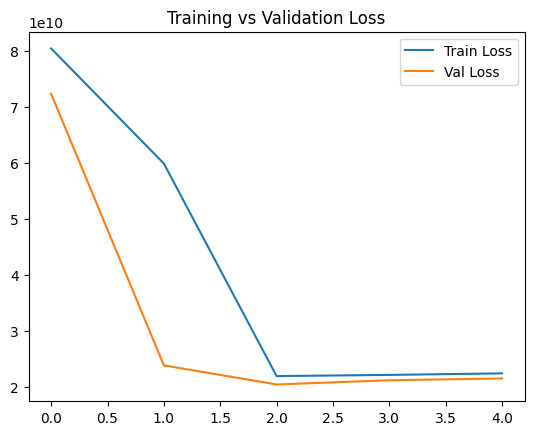

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# =============================
# Step 1: Dummy Dataset Creation (replace with real dataset in Colab)
# =============================
# Simulate tabular data (e.g., bedrooms, bathrooms, sqft)
num_samples = 1000
tabular_data = np.random.rand(num_samples, 5)  # 5 numeric features

# Simulate image data (64x64 RGB)
image_data = np.random.rand(num_samples, 64, 64, 3)

# Simulate target prices (regression)
prices = np.random.rand(num_samples) * 500000

# Train-test split
X_tab_train, X_tab_test, X_img_train, X_img_test, y_train, y_test = train_test_split(
    tabular_data, image_data, prices, test_size=0.2, random_state=42
)

# =============================
# Step 2: Build Image (CNN) Model
# =============================
image_input = Input(shape=(64, 64, 3))

cnn = layers.Conv2D(32, (3, 3), activation="relu")(image_input)
cnn = layers.MaxPooling2D((2, 2))(cnn)
cnn = layers.Conv2D(64, (3, 3), activation="relu")(cnn)
cnn = layers.MaxPooling2D((2, 2))(cnn)
cnn = layers.Flatten()(cnn)
cnn = layers.Dense(128, activation="relu")(cnn)

# =============================
# Step 3: Build Tabular (MLP) Model
# =============================
tabular_input = Input(shape=(X_tab_train.shape[1],))
mlp = layers.Dense(64, activation="relu")(tabular_input)
mlp = layers.Dense(32, activation="relu")(mlp)

# =============================
# Step 4: Combine Both (Feature Fusion)
# =============================
combined = layers.concatenate([cnn, mlp])
combined = layers.Dense(64, activation="relu")(combined)
output = layers.Dense(1, activation="linear")(combined)

# Final multimodal model
model = models.Model(inputs=[image_input, tabular_input], outputs=output)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# =============================
# Step 5: Train the Model
# =============================
history = model.fit(
    [X_img_train, X_tab_train], y_train,
    validation_data=([X_img_test, X_tab_test], y_test),
    epochs=5,
    batch_size=32
)

# =============================
# Step 6: Evaluate
# =============================
preds = model.predict([X_img_test, X_tab_test])
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("MAE:", mae)
print("RMSE:", rmse)

# =============================
# Step 7: Plot Training History
# =============================
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()
